In [4]:
import numpy as np 
import pandas as pd 
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [2]:
spam= pd.read_csv("spam.csv")
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
spam=spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
spam['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [12]:
ps = PorterStemmer()

In [13]:
stop_words = stopwords.words("english")
print(len(stop_words))
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [14]:
def remove_stopwords(text):
    text = re.sub('^a-zA-Z',' ',text)
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text).replace('  ', ' ')
    return text


In [16]:
spam["removed_stopwords"]= spam['v2'].apply(remove_stopwords)
spam.head()

,v1,v2,removed_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...","go jurong point, crazy.. avail bugi n great wo..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joke wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor... u c alreadi say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i think goe usf, live around though"


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2500)

In [19]:
X = cv.fit_transform(spam.removed_stopwords).toarray()
print(X.shape)

(5572, 2500)


In [20]:
y = pd.get_dummies(spam.v1, drop_first=True)
print(y.shape)

(5572, 1)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=False)

In [23]:
X_train.shape

(4457, 2500)

In [24]:
gauss_clf = GaussianNB()
multi_clf = MultinomialNB()

In [25]:
gauss_clf.fit(X_train, y_train)
multi_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [26]:
gauss_pred = gauss_clf.predict(X_test)
multi_pred = multi_clf.predict(X_test)

In [27]:
score_gauss = accuracy_score(gauss_pred, y_test)
score_multi = accuracy_score(multi_pred, y_test)
print(f"GaussNB Accuracy Score: {score_gauss*100:.2f}%")
print(f"MultinomialNB Accuracy Score: {score_multi*100:.2f}%")

GaussNB Accuracy Score: 85.83%
MultinomialNB Accuracy Score: 98.74%


In [29]:
average_precision_gauss = average_precision_score(y_test, gauss_pred)
average_precision_multi = average_precision_score(y_test, multi_pred)

print(f"Avg Precision for GaussianNB: {average_precision_gauss*100:.2f}%")
print(f"Avg Precision for MultinomialNB: {average_precision_multi*100:.2f}%")

Avg Precision for GaussianNB: 44.29%
Avg Precision for MultinomialNB: 91.17%


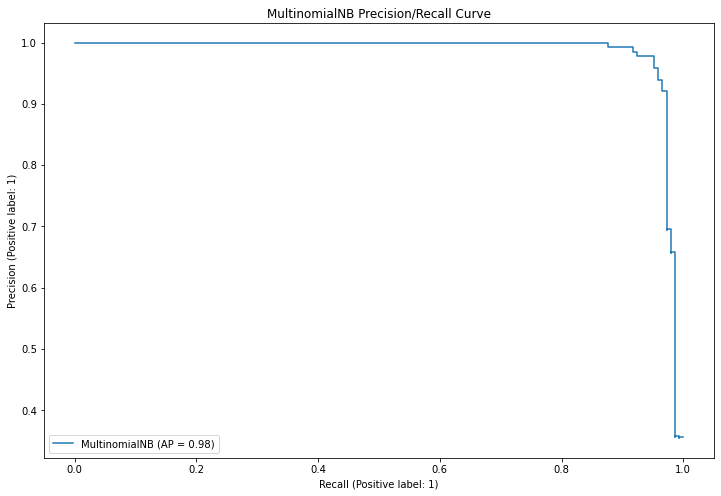

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
curve = plot_precision_recall_curve(multi_clf, X_test, y_test, ax=ax)
curve.ax_.set_title("MultinomialNB Precision/Recall Curve");